

I want to measure these stats

EPA per play

In [2]:
import nflfastpy as nfl
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
pd.set_option('display.max_rows', None)

In [11]:
#Import the play by play data from nfl fast py (2017-2021)

pbp_1999 = nfl.load_pbp_data(1999)
pbp_2000 = nfl.load_pbp_data(2000)
pbp_2001 = nfl.load_pbp_data(2001)
pbp_2002 = nfl.load_pbp_data(2002)
pbp_2003 = nfl.load_pbp_data(2003)
pbp_2004 = nfl.load_pbp_data(2004)
pbp_2005 = nfl.load_pbp_data(2005)
pbp_2006 = nfl.load_pbp_data(2006)
pbp_2007 = nfl.load_pbp_data(2007)
pbp_2008 = nfl.load_pbp_data(2008)
pbp_2009 = nfl.load_pbp_data(2009)
pbp_2010 = nfl.load_pbp_data(2010)
pbp_2011 = nfl.load_pbp_data(2011)
pbp_2012 = nfl.load_pbp_data(2012)
pbp_2013 = nfl.load_pbp_data(2013)
pbp_2014 = nfl.load_pbp_data(2014)
pbp_2015 = nfl.load_pbp_data(2015)
pbp_2016 = nfl.load_pbp_data(2016)
pbp_2017 = nfl.load_pbp_data(2017)
pbp_2018 = nfl.load_pbp_data(2018)
pbp_2019 = nfl.load_pbp_data(2019)
pbp_2020 = nfl.load_pbp_data(2020)
pbp_2021 = nfl.load_pbp_data(2021)

pbp = pd.concat([pbp_1999,pbp_2000, pbp_2001, pbp_2002, pbp_2003, pbp_2004, pbp_2005, 
                 pbp_2006, pbp_2007, pbp_2008, pbp_2009,pbp_2010,pbp_2011, pbp_2012, 
                 pbp_2013, pbp_2014, pbp_2015, pbp_2016, pbp_2017, pbp_2018, pbp_2019, 
                 pbp_2020, pbp_2021])

In [12]:
pbp

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,35,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,0.126818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.561568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,82,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.641717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,-0.723302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,126,1999_01_ARI_PHI,1999091200,PHI,ARI,REG,1,PHI,home,ARI,...,0,1,0.212661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0,-1.242206,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129545
50708,3951,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50709,3968,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,CIN,home,LA,...,0,0,-0.569208,0.2636,4.354299,2.0,0.998861,0.998861,0.747601,25.239891
50710,3990,2021_22_LA_CIN,2022021301,CIN,LA,POST,22,LA,away,CIN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Split the play by play data by season and playoffs

pbp_playoffs = pbp[pbp['season_type'] == 'POST']
pbp_reg_season = pbp[pbp['season_type'] == 'REG']

In [43]:
#Restructure the play by play data to get QBs grouped together with EPA and CPOE
qbs_reg_season = pbp_reg_season.groupby(['passer_player_id'], as_index = False).agg({'play_id': 'count', 'epa': 'mean', 'cpoe':'mean', "passer_player_name": lambda x: list(x), "posteam": lambda x: list(x)})
qbs_reg_season["passer_player_name"] = qbs_reg_season["passer_player_name"].str.get(0)
qbs_reg_season["posteam"] = qbs_reg_season["posteam"].str.get(-1)
qbs_reg_season = qbs_reg_season.loc[qbs_reg_season.play_id > 400]

qbs_playoffs = pbp_playoffs.groupby(['passer_player_id'], as_index = False).agg({'play_id': 'count', 'epa': 'mean', 'cpoe':'mean'})

In [70]:
#Join the regular season and playoff table

qbs_reg_season_vs_playoffs = pd.merge(qbs_reg_season, qbs_playoffs, how="inner", left_on = "passer_player_id", right_on = "passer_player_id")
qbs_reg_season_vs_playoffs = qbs_reg_season_vs_playoffs[(qbs_reg_season_vs_playoffs["play_id_y"] > 100) | (qbs_reg_season_vs_playoffs["play_id_x"] > 100)]
qbs_reg_season_vs_playoffs

,passer_player_id,play_id_x,epa_x,cpoe_x,passer_player_name,posteam,play_id_y,epa_y,cpoe_y
0,00-0000104,736,-0.015489,NaN,T.Aikman,DAL,38,-0.174722,NaN
1,00-0000722,1191,-0.079903,NaN,T.Banks,HOU,3,-0.924272,NaN
3,00-0001361,3651,-0.023732,-3.685207,D.Bledsoe,DAL,23,-0.001710,NaN
4,00-0001823,3209,-0.017187,-2.023977,A.Brooks,LV,82,0.182860,NaN
5,00-0002110,3173,0.000311,-2.379462,M.Brunell,NYJ,108,-0.139894,NaN
6,00-0003292,4977,0.008196,-3.348843,K.Collins,IND,190,0.036637,1.284162
7,00-0003315,195,0.005831,-0.733313,T. Collins,CHI,57,-0.349010,-3.531206
8,00-0003739,3506,0.056172,-2.771889,D.Culpepper,DET,144,0.028125,NaN
9,00-0004161,3105,0.005463,-0.704925,J.Delhomme,HOU,245,0.021620,-8.215688
10,00-0004229,181,-0.303689,NaN,K.Detmer,PHI,16,-0.331889,NaN


In [89]:
qbs_reg_season_vs_playoffs = qbs_reg_season_vs_playoffs.rename(columns={'epa_x': 'epa_reg_season', 'epa_y':'epa_playoffs', 'passer_player_name':'player', 'posteam':'team', 'passer_player_id': 'id'})
qbs_reg_season_vs_playoffs = qbs_reg_season_vs_playoffs[['id', 'player', 'team','epa_reg_season', 'epa_playoffs']].reset_index(drop=True)

In [91]:
qbs_reg_season_vs_playoffs 

,id,player,team,epa_reg_season,epa_playoffs
0,00-0000104,T.Aikman,DAL,-0.015489,-0.174722
1,00-0000722,T.Banks,HOU,-0.079903,-0.924272
2,00-0001361,D.Bledsoe,DAL,-0.023732,-0.001710
3,00-0001823,A.Brooks,LV,-0.017187,0.182860
4,00-0002110,M.Brunell,NYJ,0.000311,-0.139894
5,00-0003292,K.Collins,IND,0.008196,0.036637
6,00-0003315,T. Collins,CHI,0.005831,-0.349010
7,00-0003739,D.Culpepper,DET,0.056172,0.028125
8,00-0004161,J.Delhomme,HOU,0.005463,0.021620
9,00-0004229,K.Detmer,PHI,-0.303689,-0.331889


In [92]:
#Load the team colors from nflfastpy
teams_colors_logos = nfl.load_team_logo_data()
teams_colors_logos = teams_colors_logos[["team_abbr", "team_color"]]

In [93]:
qbs_reg_season_vs_playoffs = qbs_reg_season_vs_playoffs[qbs_reg_season_vs_playoffs["epa_playoffs"] < 3]

Text(0, 0.5, 'EPA per play - Playoffs')

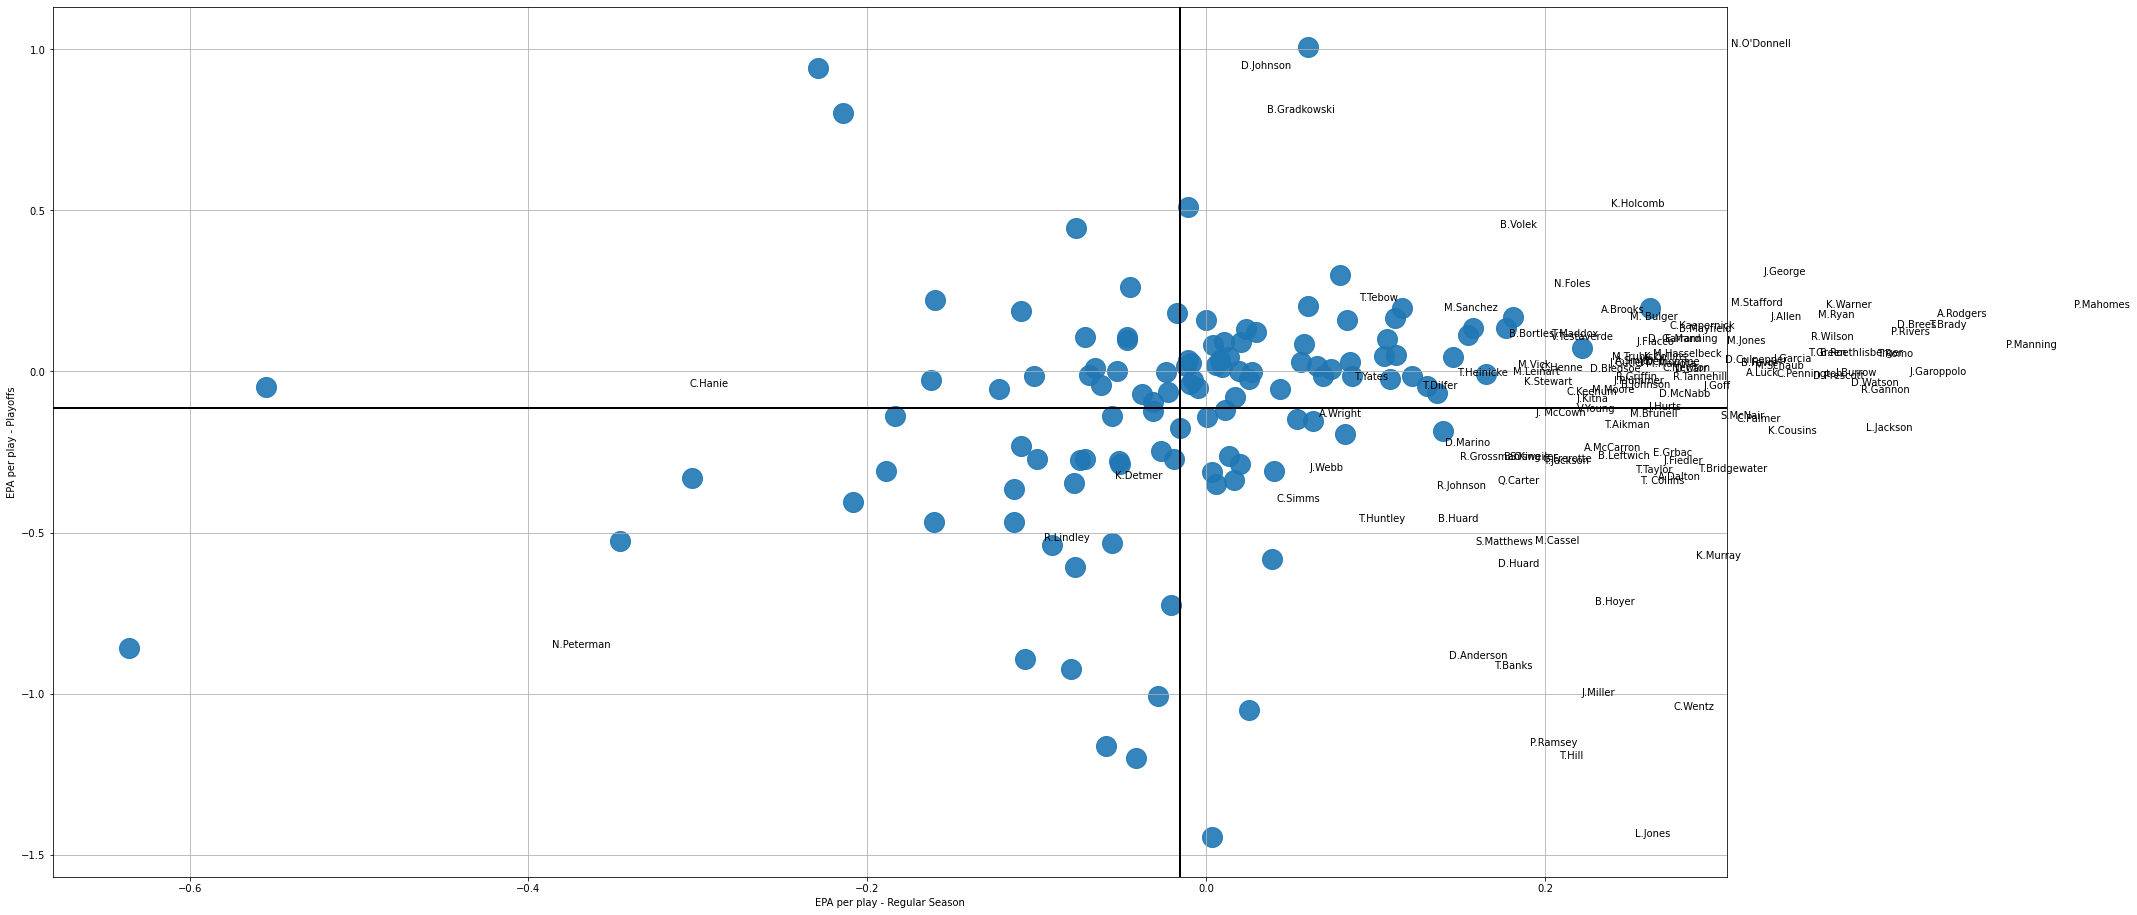

In [98]:
# We will now create the scatterplot visualization

fig, ax = plt.subplots(figsize=(30,16))

ax.axvline(qbs_reg_season_vs_playoffs['epa_reg_season'].mean(), color='black', lw = 2)
ax.axhline(qbs_reg_season_vs_playoffs['epa_playoffs'].mean(), color='black', lw = 2)

ax.scatter(qbs_reg_season_vs_playoffs['epa_reg_season'], qbs_reg_season_vs_playoffs['epa_playoffs'], alpha=.9, s = 400)

for line in range(0, qbs_reg_season_vs_playoffs.shape[0]):
    plt.text(qbs_reg_season_vs_playoffs.epa_reg_season[line]+0.25,qbs_reg_season_vs_playoffs.epa_playoffs[line], qbs_reg_season_vs_playoffs.player[line])
plt.grid()
ax.set_xlabel("EPA per play - Regular Season")
ax.set_ylabel("EPA per play - Playoffs")